# プロットと可視化

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [3]:
%pwd

'/Users/miyamoto/Projects/sample/pydata-book'

# python tips

## ① functools.partial

In [4]:
def add(x, y):
    return x + y
import functools
add_1 = functools.partial(add, 1) #add関数の２個目の引数を１で固定して関数を作成
print(add_1(1))
print(add_1(2))

2
3


In [5]:
import itertools
g = itertools.count() #整数をインクリメントしながら順番に返すイテレータを返す。
print(g)
print(next(g))
print(next(g))

count(0)
0
1


In [10]:
import itertools
g = itertools.count()
callable = functools.partial(next, g) #こう書ける
print(callable()) #next　nextってしなくてもよくなる
print(callable())

print(g.__next__())
print(g.__next__())


0
1
2
3


In [8]:
ite = iter(callable, 10)
print(list(ite))

[2, 3, 4, 5, 6, 7, 8, 9]


## ② numpy.recarray

変数の名前付けのようなもの

In [12]:
x = np.array([(1.0, 2), (3.0, 4)], dtype=[('x', float), ('y', int)])
x

array([( 1., 2), ( 3., 4)],
      dtype=[('x', '<f8'), ('y', '<i8')])

In [13]:
x['x']

array([ 1.,  3.])

In [14]:
x = x.view(np.recarray)

In [15]:
print(x.x)

print(x.y)

[ 1.  3.]
[2 4]


## ③ Pythonの内包表記はなぜ速い？

参考：http://dsas.blog.klab.org/archives/51742727.html
インタプリタが解釈する命令数が減る、属性の取り出しが不要になる、関数呼び出しが不要になる、という3つの理由で、リスト内包表記を使うと速くなります。

インタープリターの命令

In [16]:
def sample_loop(n):
    L = []
    for i in range(n):
        L.append(i)
    return L

def sample_comprehension(n):
    return [i for i in range(n)]

%timeit sample_loop(10000)
%timeit sample_comprehension(10000)

886 µs ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
424 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
from dis import dis
print(dis(sample_loop))
print("----------------------")
print(dis(sample_comprehension))

  2           0 BUILD_LIST               0
              3 STORE_FAST               1 (L)

  3           6 SETUP_LOOP              33 (to 42)
              9 LOAD_GLOBAL              0 (range)
             12 LOAD_FAST                0 (n)
             15 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             18 GET_ITER
        >>   19 FOR_ITER                19 (to 41)
             22 STORE_FAST               2 (i)

  4          25 LOAD_FAST                1 (L)
             28 LOAD_ATTR                1 (append)
             31 LOAD_FAST                2 (i)
             34 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             37 POP_TOP
             38 JUMP_ABSOLUTE           19
        >>   41 POP_BLOCK

  5     >>   42 LOAD_FAST                1 (L)
             45 RETURN_VALUE
None
----------------------
  8           0 LOAD_CONST               1 (<code object <listcomp> at 0x107bc2420, file "<ipython-input-16-df6c0a1ca15a>", line 8>)
           

In [18]:
from dis import dis
print(dis(sample_loop))
print("----------------------")
print(dis(sample_comprehension))

  2           0 BUILD_LIST               0
              3 STORE_FAST               1 (L)

  3           6 SETUP_LOOP              33 (to 42)
              9 LOAD_GLOBAL              0 (range)
             12 LOAD_FAST                0 (n)
             15 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             18 GET_ITER
        >>   19 FOR_ITER                19 (to 41)
             22 STORE_FAST               2 (i)

  4          25 LOAD_FAST                1 (L)
             28 LOAD_ATTR                1 (append)
             31 LOAD_FAST                2 (i)
             34 CALL_FUNCTION            1 (1 positional, 0 keyword pair)
             37 POP_TOP
             38 JUMP_ABSOLUTE           19
        >>   41 POP_BLOCK

  5     >>   42 LOAD_FAST                1 (L)
             45 RETURN_VALUE
None
----------------------
  8           0 LOAD_CONST               1 (<code object <listcomp> at 0x107bc2420, file "<ipython-input-16-df6c0a1ca15a>", line 8>)
           

In [25]:
print(sample_loop.__code__)

<code object sample_loop at 0x106887db0, file "<ipython-input-19-df6c0a1ca15a>", line 1>


## ④ CPU キャッシュの効果

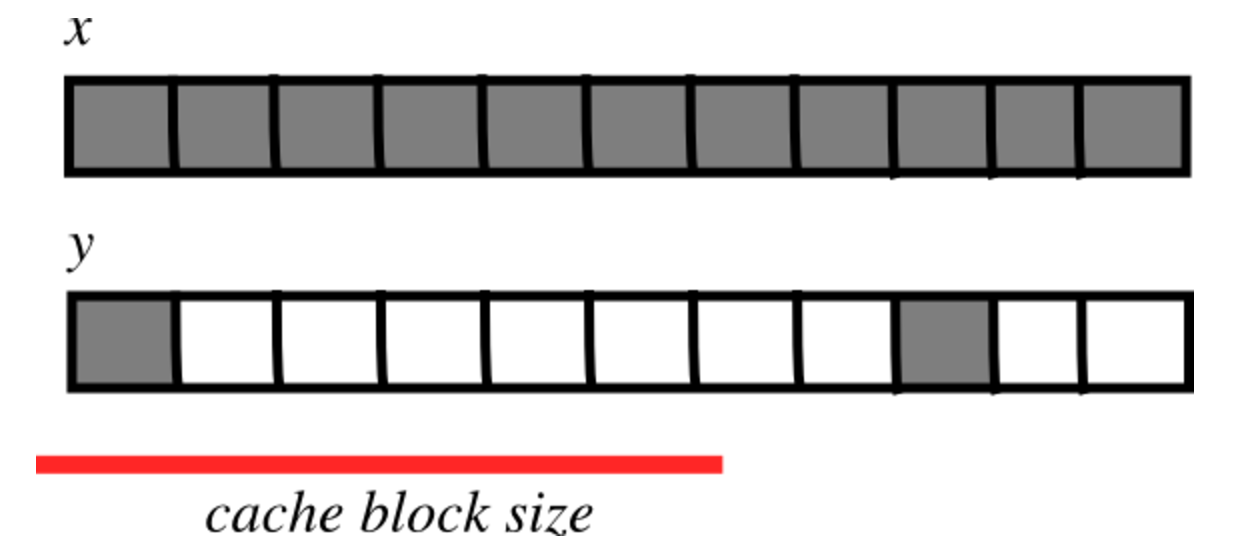

In [97]:
x = np.zeros((20000,))
y = np.zeros((20000*67,))[::67]
print(x.shape)
print(y.shape)

(20000,)
(20000,)


In [98]:
%timeit x.sum() #こっちの方が早い

13 µs ± 775 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [99]:
%timeit y.sum()

87.2 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [100]:
x.strides, y.strides

((8,), (536,))

CPU はメインメモリから CPU キャッシュブロック内にデータを引っぱりだします<br>
多くの配列要素が、(小さいストライドで)単一ブロック内に収まって、連続して演算される場合:<br>
⇒⇒ 必要な転送が少なくなります<br>
⇒⇒ faster<br>

## 簡単なmatplotlib API入門

In [19]:
import matplotlib.pyplot as plt

### 図とサブプロット

In [20]:
#Figureインスタンスは、描画全体の領域を確保する。

In [21]:
fig = plt.figure()

In [27]:
#add_subplotでsubplotの追加
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot([1,2,3,4])

In [28]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

## plt.subplot

In [61]:
#現在の描画領域(fig = figure()のこと)に追加するメソッド

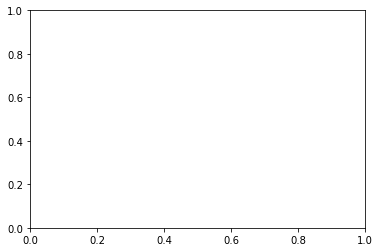

In [30]:
plt.subplot(111) #1個表示 (1 * 1グリッドで1個)

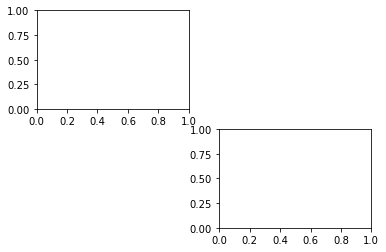

In [32]:
plt.subplot(221) #2 * 2グリッドの１個目を表示
plt.subplot(224) #2 * 2グリッドの4個目を表示

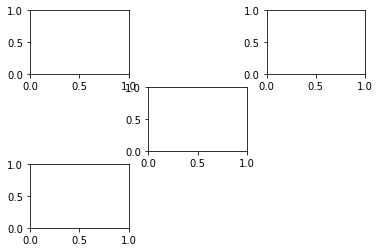

In [33]:
plt.subplot(3,3,1)
plt.subplot(3,3,3)
plt.subplot(3,3,5)
plt.subplot(3,3,7)

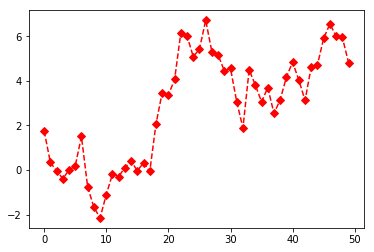

In [40]:
from numpy.random import randn
#randnでランダムデータ生成し、cumsumで累積和
plt.plot(randn(50).cumsum(), 'rD--')

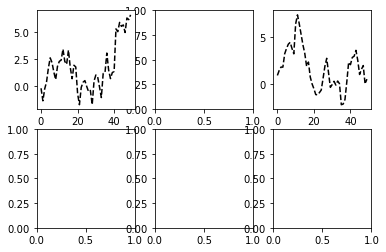

In [41]:
fig, axes = plt.subplots(2, 3)
#１個目
plt.subplot(231)
plt.plot(randn(50).cumsum(), 'k--')
#3個目
plt.subplot(233)
plt.plot(randn(50).cumsum(), 'k--')

[]

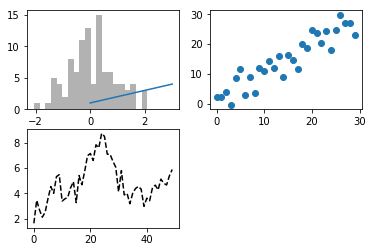

In [60]:
#subplotをまとめて plotしてる
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot([1,2,3,4])
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(randn(50).cumsum(), 'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30)) #散布図

plt.plot()

<class 'matplotlib.axes._subplots.AxesSubplot'>


[]

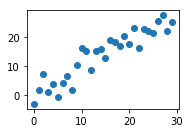

In [62]:
#subplotのみで表示
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
print(type(ax1))
ax1.plot()
# plt.plot()

In [63]:
plt.close('all')

In [80]:
# fig, axes = plt.subplots(2, 3) #重なってる
# axes

### サブプロット周辺の間隔を調整する

In [62]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

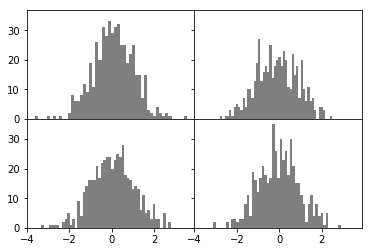

In [63]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

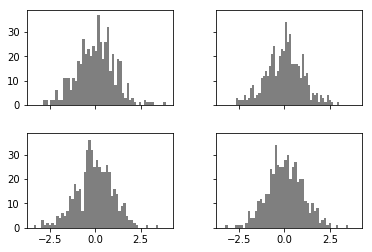

In [67]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.3, hspace=0.3) #0.3空けた

### 色、マーカー、線のスタイル

In [64]:
plt.figure()

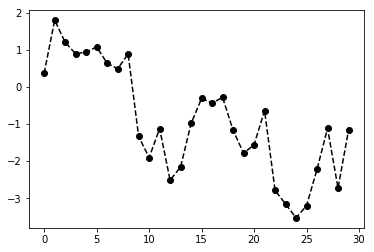

In [65]:
plt.plot(randn(30).cumsum(), 'ko--')

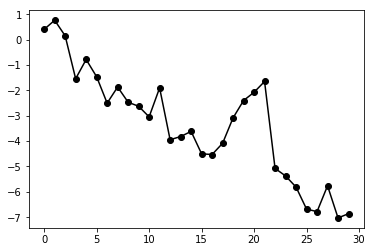

In [66]:
plt.plot(randn(30).cumsum(), 'ko-')

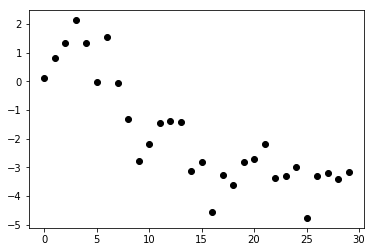

In [67]:
plt.plot(randn(30).cumsum(), 'ko')

In [68]:
plt.close('all')

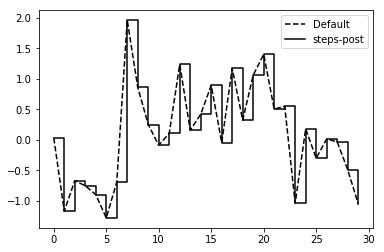

In [69]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

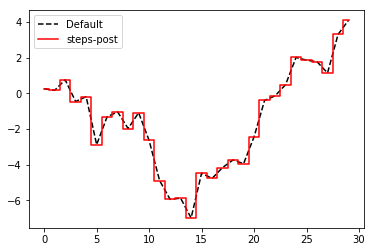

In [77]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-mid', label='steps-post') #drawstyle	[‘default’ | ‘steps’ | ‘steps-pre’ | ‘steps-mid’ | ‘steps-post’]
plt.legend(loc='best')  #labelをいい感じのところに移動

# 'best'         : 0, (only implemented for axes legends)
# 'upper right'  : 1,
# 'upper left'   : 2,
# 'lower left'   : 3,
# 'lower right'  : 4,
# 'right'        : 5,
# 'center left'  : 6,
# 'center right' : 7,
# 'lower center' : 8,
# 'upper center' : 9,
# 'center'       : 10,

### 目盛り、ラベル、凡例

#### タイトル、軸ラベル（axis labels）, 目盛り（ticks）、目盛りラベルの設定

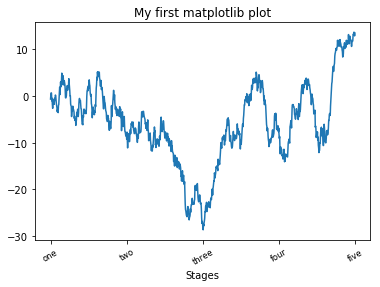

In [79]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #set_xticksで設定した場所に、set_xticklabelsの値を表示
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### 凡例追加

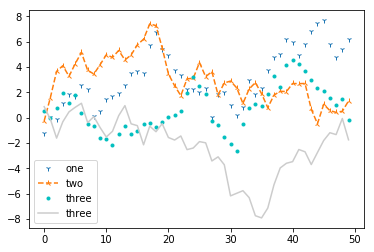

In [105]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(50).cumsum(), '1', label='one') #label
ax.plot(randn(50).cumsum(), '2--', label='two')
ax.plot(randn(50).cumsum(), 'c.', label='three')
ax.plot(randn(50).cumsum(), '#CCCCCC', label='three')

ax.legend(loc='best') #labelを追加したらlegendで表示できる


### 注釈やサブプロットの描画

In [96]:
from datetime import datetime
data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
data.head(5)

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


(5472, 1)
date 2007-10-11 00:00:00
 : 2007-10-11 00:00:00 1604.41
 : 2007-10-11 00:00:00 1754.41
date 2008-03-12 00:00:00
 : 2008-03-12 00:00:00 1358.77
 : 2008-03-12 00:00:00 1508.77
date 2008-09-15 00:00:00
 : 2008-09-15 00:00:00 1242.7
 : 2008-09-15 00:00:00 1392.7


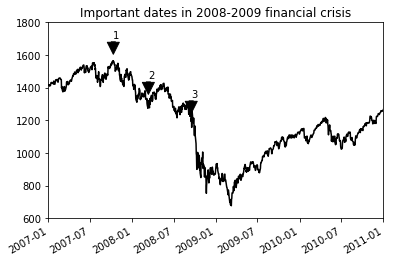

In [110]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
print(data.shape)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

#ここに注釈をつける
crisis_data = [
    (datetime(2007, 10, 11), u'1'),
    (datetime(2008, 3, 12), u'2'),
    (datetime(2008, 9, 15), u'3')
]

for date, label in crisis_data:
    print("date", date)
    print(" :", date, spx.asof(date) + 50)
    print(" :", date, spx.asof(date) + 200)
    
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

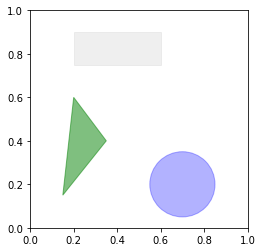

In [120]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal") #アスペクト比を合わせる

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='#CCCCCC', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5) #ポリゴン

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### plotsをファイルに保存

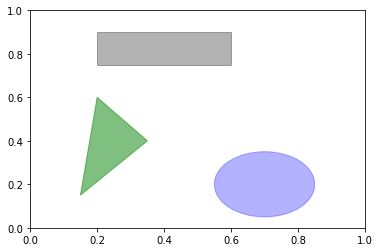

In [7]:
fig

In [8]:
fig.savefig('figpath.svg')

In [9]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [121]:
from io import BytesIO
buffer = BytesIO()
print(type(buffer))

plt.savefig(buffer)
plot_data = buffer.getvalue()

<class '_io.BytesIO'>


### matplotlib configuration

In [125]:
plt.rc('figure', figsize=(5, 5))

## Plotting functions in pandas

### Line plots

In [126]:
plt.close('all')

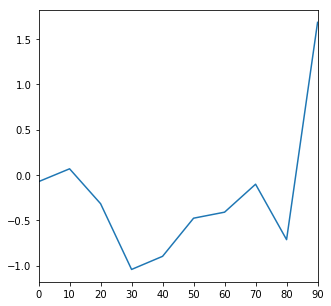

In [127]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

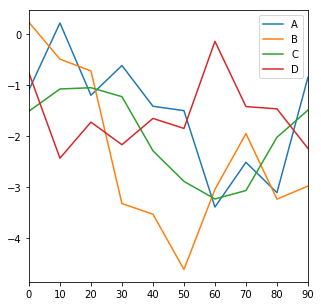

In [128]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

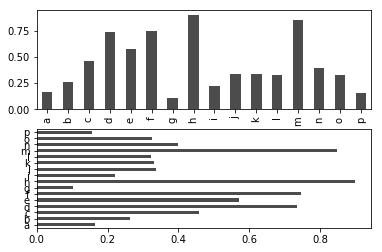

In [89]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

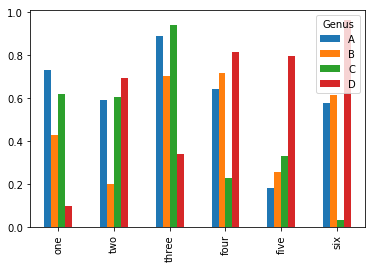

In [90]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [91]:
plt.figure()

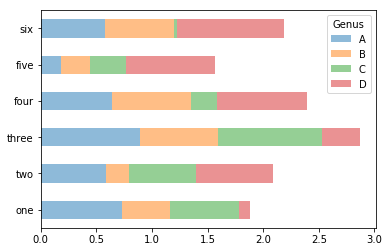

In [92]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [93]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [96]:
# # Normalize to sum to 1
# party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
# party_pcts

# party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [43]:
plt.figure()

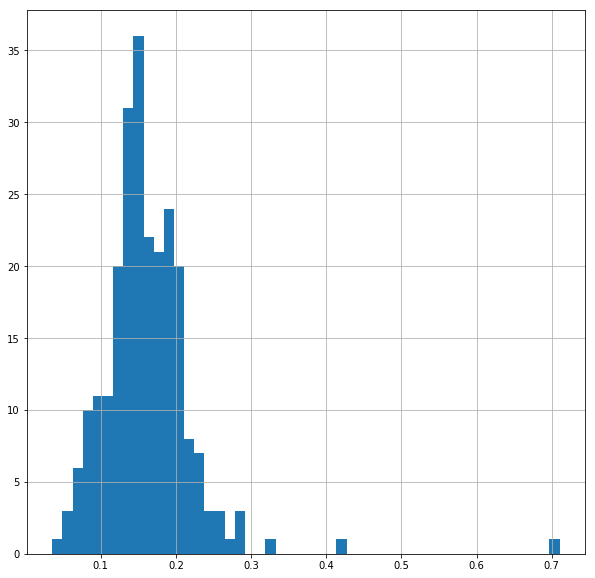

In [44]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [45]:
plt.figure()

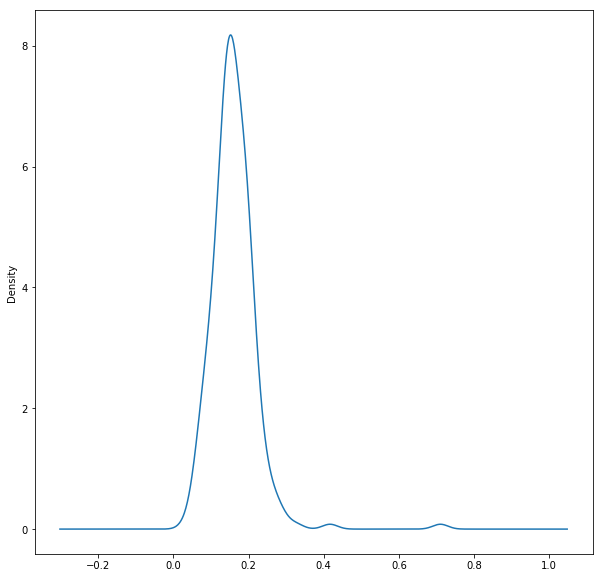

In [46]:
tips['tip_pct'].plot(kind='kde')


In [47]:
plt.figure()

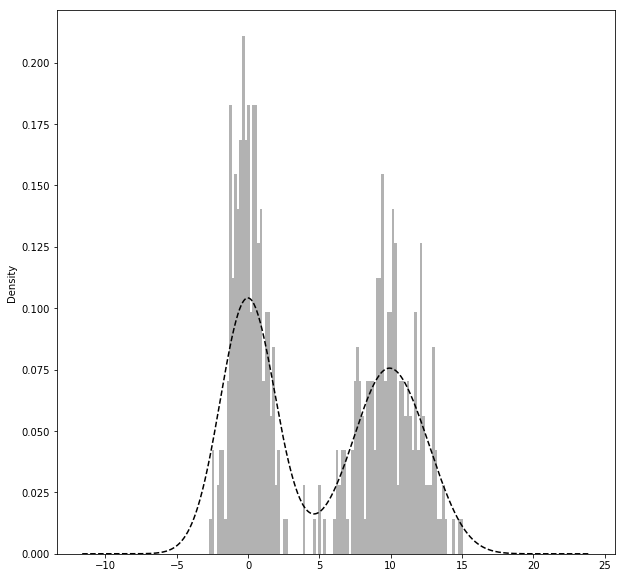

In [48]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 散布図　Scatter plots

In [49]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [50]:
plt.figure()

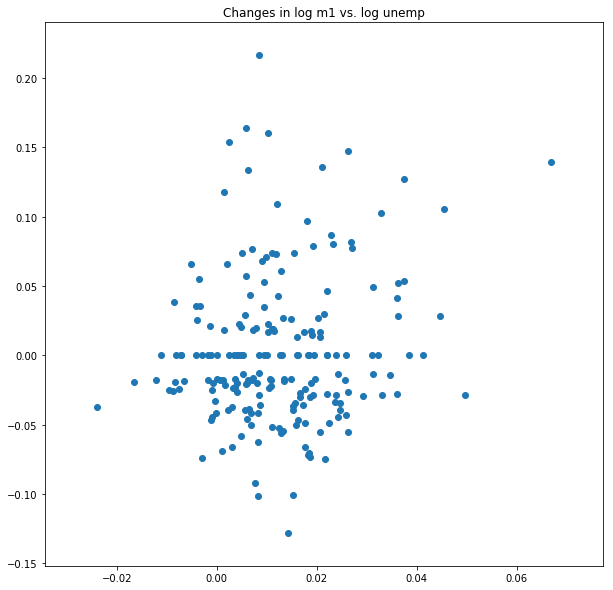

In [51]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1109472b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110f357b8>]], dtype=object)

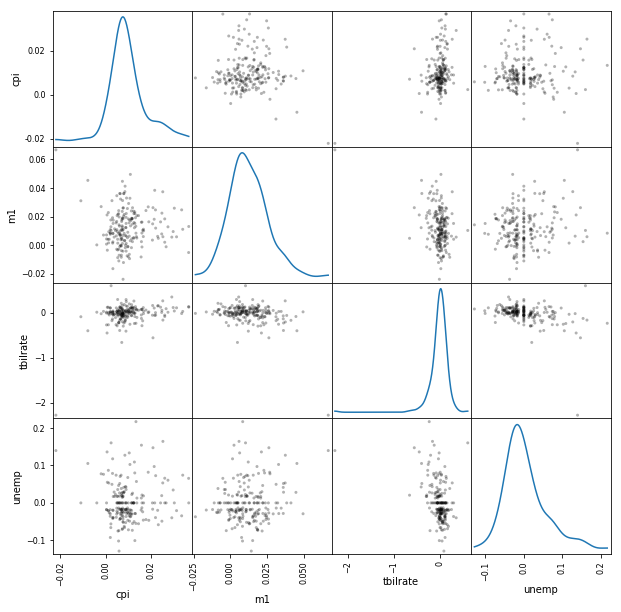

In [52]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 地図のプロット

googleスプレッドシートがすごく楽<br>

https://sitest.jp/blog/?p=11764

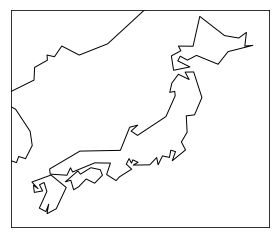

In [6]:
#参考
#http://www.mwsoft.jp/programming/numpy/plot_map.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 緯度経度で範囲を指定する
north = 46.
south = 30.
east = 147.
west = 128.

# 地図の表示
m = Basemap(llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east)
# 海岸線を引く
m.drawcoastlines() 

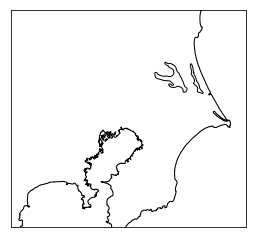

In [10]:
north = 36.5
south = 35.
east = 141.
west = 139.

# 地図の表示
m = Basemap(projection='merc', llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east, resolution='f')
m.drawcoastlines()
m.drawstates()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (h

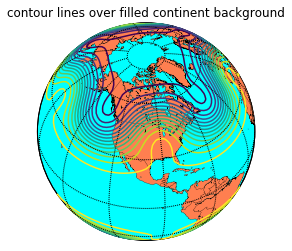

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


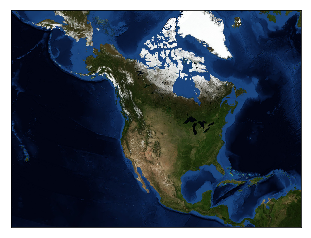

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,4))
m = Basemap(projection='merc',
                 resolution='h',
                 llcrnrlon=131,
                 llcrnrlat=33,
                 urcrnrlon=141,
                 urcrnrlat=38)

m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.fillcontinents(color='white', lake_color='#eeeeee');
m.drawmapboundary(fill_color='#eeeeee')
#m.drawparallels(np.arange(31.0, 38.1, 1.0), labels = [1,0,0,0], fontsize=12)
#m.drawmeridians(np.arange(132.0, 140.1, 2.0), labels = [0,0,0,1], fontsize=12)

sumoto_lon = 134.7687
sumoto_lat = 34.3755
hiratsuka_lon = 139.3581
hiratsuka_lat = 35.3587

x1,y1 = m(sumoto_lon, sumoto_lat)
x2,y2 = m(hiratsuka_lon, hiratsuka_lat)
m.plot(x1, y1, 'm.', markersize=10)
m.plot(x2, y2, 'm.', markersize=10)
plt.text(x1 + 10000, y1 + 10000, u"sumoto")
plt.text(x2 + 10000, y2 + 10000, u"hiratsuka")

plt.show()

## 地図のプロット：ハイチ地震の災害データ（細かくやらない）

In [8]:
#ushihidiは非営利組織で、自然災害や地政学的な出来事に関する情報の、テキストメッセージを用いたクラウドソーシングを行ってる。
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [9]:
#各行は事件が起きた場合に利用者からメッセージが送られてきたデータ。日付時刻、経度緯度。
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [10]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [11]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [12]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [13]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [14]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [15]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [16]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [18]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [19]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [20]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


In [21]:
#conda install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


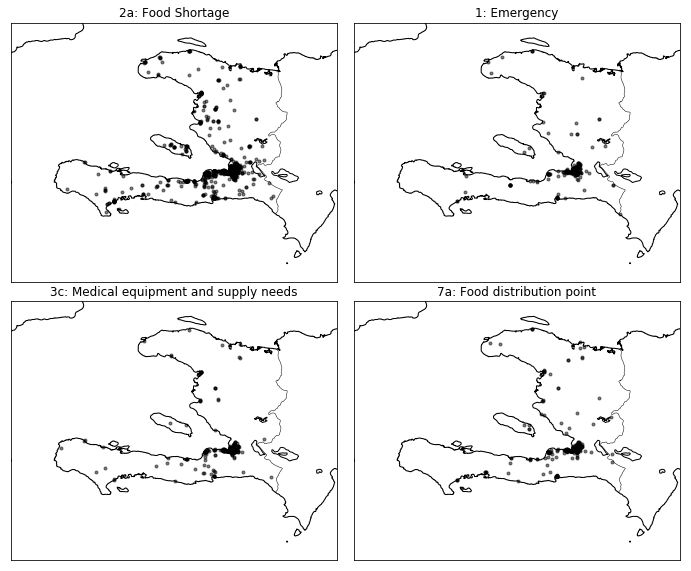

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

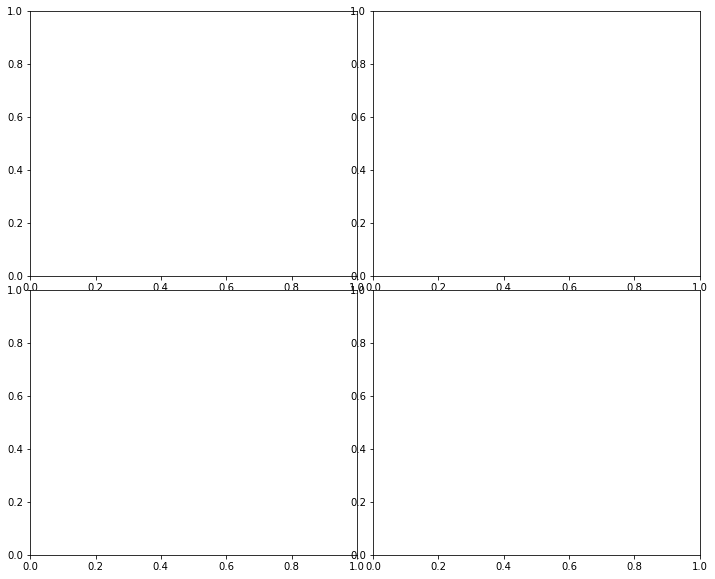

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [26]:
make_plot()

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [25]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x10903ceb8>)

# seaborn

おしゃれ。

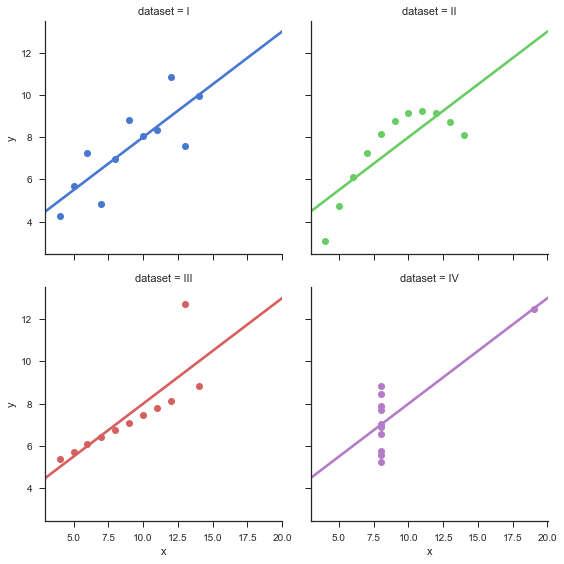

In [27]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

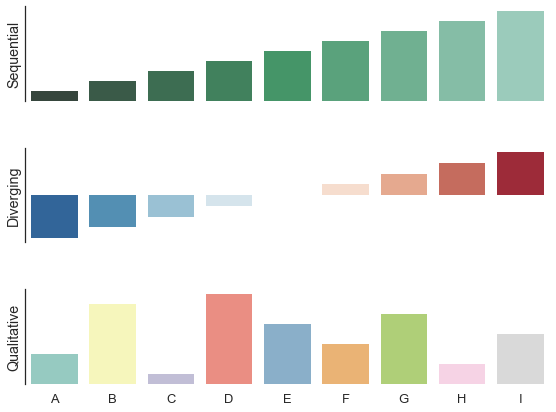

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

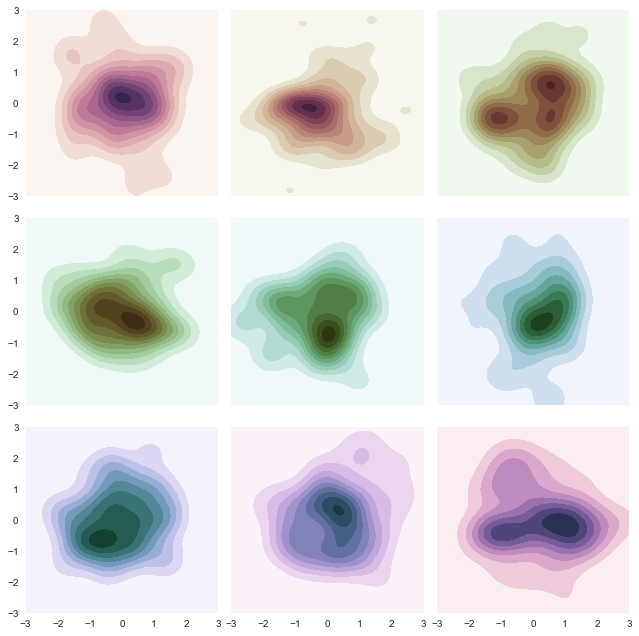

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

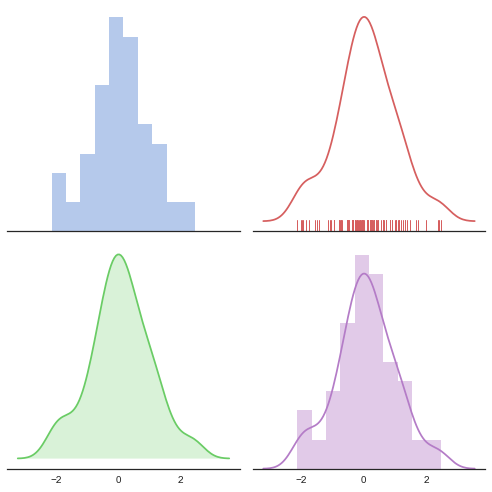

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

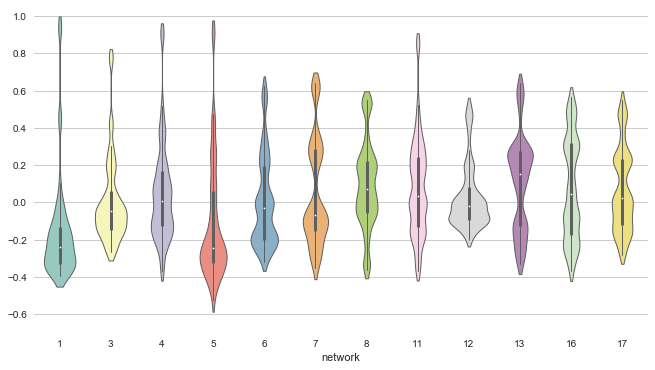

In [32]:
#バイオリンプロット
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

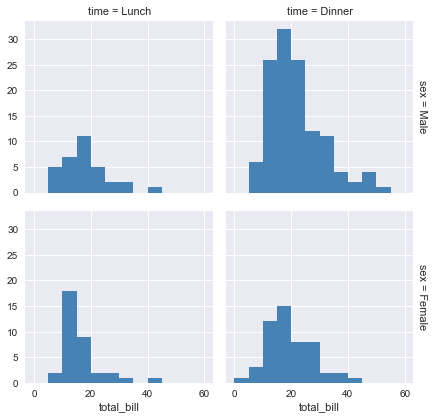

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

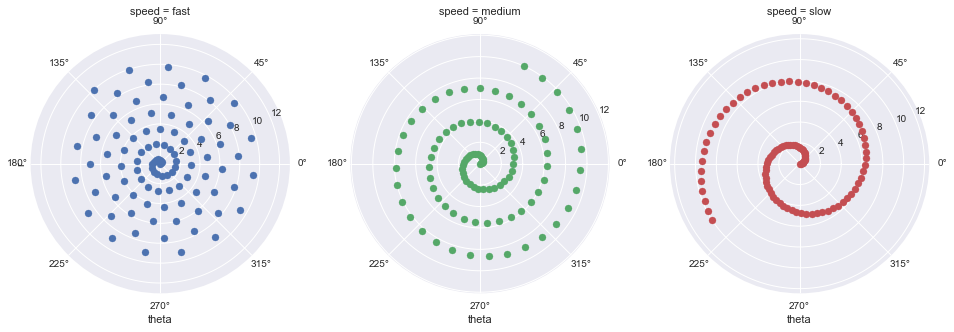

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

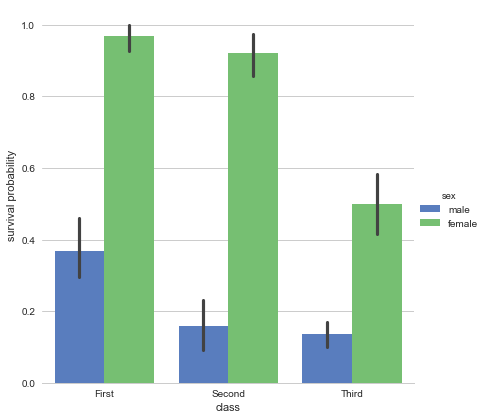

In [35]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

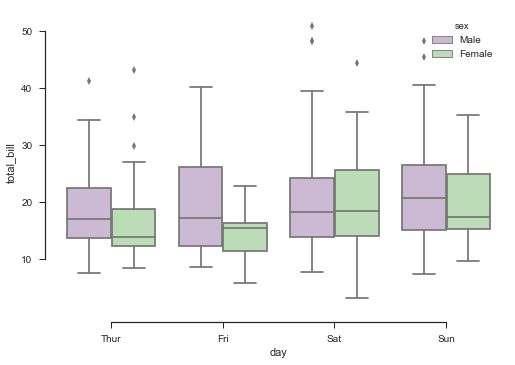

In [36]:
import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

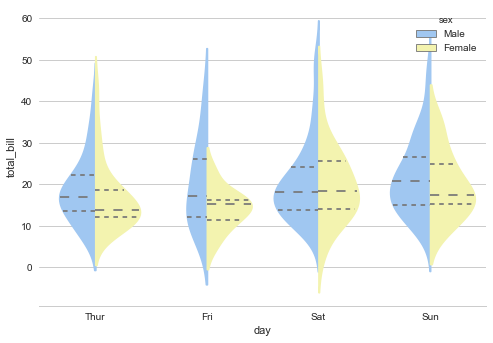

In [37]:
#グループされたバイオリンプロット
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

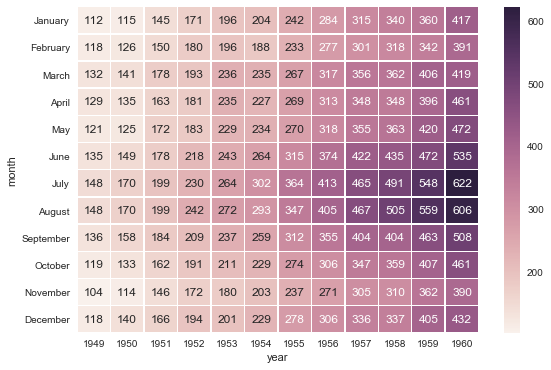

In [38]:
#注釈付きヒートマップ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# bokhe

d3.js。巨大なデータに強い。

In [129]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
output_notebook()
#sudo pip install bokeh==0.12.7
#sudo pip install bkcharts

# import bokeh.sampledata
# bokeh.sampledata.download()

Loading BokehJS ...

In [130]:
# サンプルデータから人口DataFrameを取得
from bokeh.sampledata.population import load_population
df = load_population()

# 日本のデータに限定する
dfjapan = df[df['Location']=='Japan']

# 棒グラフ関数
# from bokeh.charts import Bar  # Ver.0.12.5以前
from bkcharts import Bar  # Ver.0.12.6以降

# 棒グラフを作成
p = Bar(dfjapan, label='AgeGrp', values='Value', agg='mean', legend=False, title='棒グラフ')

# 結果を出力
show(p)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0883ebb7-7c2b-4fd5-9d2d-9e0c6a043c1e', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='1ebb5a39-921b-4dd6-bdbf-2eb3969b400a', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='4c9d8e80-8790-4949-8c85-cf14d67d8421', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='7b5cf756-452d-4594-9523-ad9b79e0fadc', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='83bdd49e-a933-479d-8132-18491ae95537', ...)
E-1010 (CDSVIEW

In [131]:
# figureで新規プロットを作成
p = figure(plot_width=400, plot_height=400)

p.circle([1, 2, 3, 4, 5],  # 各円のX座標
         [4, 6, 1, 8, 3],  # 各円のY座標
         size=[10, 12, 14, 16, 18],  # 各円の大きさ
         line_color="navy",# 線の色
         fill_color="blue",# 円の色
         fill_alpha=0.5)   # 透明度

show(p)  # 結果を出力

In [132]:
# figure関数を使って新規プロットを作成(タイトルを指定)
p = figure(plot_width=400, plot_height=400, title="線グラフ")

p.line([1, 2, 3, 4, 5], # X
       [4, 6, 1, 8, 3], # Y
       line_width=2)    # 線の太さ

show(p)  # 結果を出力

In [133]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [134]:
opts = dict(plot_width=250, plot_height=250, min_border=0)
p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t = show(row(p1, p2), notebook_handle=True)

In [135]:
# the comms handle repr show what cell it can be used to update
t

In [136]:
# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)


In [137]:
# and this will update the right plot circle color because it was in the last shown cell
r2.glyph.fill_color = "pink"
push_notebook()

In [138]:
p3 = figure(**opts)
r3 = p3.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t2 = show(p3, notebook_handle=True)

In [139]:
# show which cell t2 handles
t2

In [140]:
# this updates the immediately previous cell with an explicit handle
r3.glyph.fill_color = "orange"
push_notebook(handle=t2)

In [141]:
# this updates the left plot at the top with an explicit handle
r1.glyph.fill_color = "orange"
push_notebook(handle=t)

In [142]:
# get a handle to update the shown cell with
t3 = show(p2, notebook_handle=True)

In [143]:
# this will update the immediately previous plot circle color because it was in the last shown cell
r2.glyph.fill_color = "red"
push_notebook()

In [144]:
# this will update the immediately previous plot circle color with an explicit handle
r2.glyph.fill_color = "blue"
push_notebook(handle=t3)

## Basic Interactor Demo

In [145]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [146]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [147]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [148]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [149]:
show(p, notebook_handle=True)

In [150]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

<function __main__.update>

## Categorical Data

In [151]:
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure

output_notebook()


Loading BokehJS ...

In [152]:
#Basic Bar Plot
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

p = figure(x_range=fruits, plot_height=250, toolbar_location=None, title="Fruit Counts")
p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

In [153]:
#Grouped Bars (Hierarchical Categories)
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, toolbar_location=None, title="Fruit Counts by Year")
p.vbar(x='x', top='counts', width=0.9, source=source)

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1

show(p)

# plotly

In [41]:
#クラウドベースの可視化ツール
#sudo pip install plotly
#sudo pip install cufflinks
#sudo pip install pandas_datareader

#アカウント作らないといけないかと思ったらofflineってのなら無料で使えるとのこと
#https://plot.ly/accounts/

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])
#htmlが出力される

'file:///Users/miyamoto/Projects/sample/pydata-book/temp-plot.html'

In [17]:
init_notebook_mode(connected=True)

In [18]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [7]:
from plotly.graph_objs import *
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

確かにすごい。。。

In [8]:
import cufflinks as cf
iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

In [9]:
#png
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

offline.iplot({'data': [{'y': [4, 2, 3, 4]}], 
               'layout': {'title': 'Test Plot', 
                          'font': dict(size=16)}},
             image='png')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Dashboard API in Python

In [10]:
#Initialize a Dashboard
import plotly.dashboard_objs as dashboard

import IPython.display
from IPython.display import Image

my_dboard = dashboard.Dashboard()
my_dboard.get_preview()

In [14]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.graph_objs import Scatter, Figure, Layout

import numpy as np

colorscale = [[0, '#FAEE1C'], [0.33, '#F3558E'], [0.66, '#9C1DE7'], [1, '#581B98']]
trace1 = go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size='16',
        color = np.random.randn(500),
        colorscale=colorscale,
        showscale=True
    )
)
data = [trace1]

plot(data)
#htmlが出力される

'file:///Users/miyamoto/Projects/sample/pydata-book/temp-plot.html'

In [15]:
iplot(data, filename='scatter-for-dashboard')

In [13]:
# import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objs as go

import numpy as np

x0 = np.random.randn(50)
x1 = np.random.randn(50) + 2
x2 = np.random.randn(50) + 4
x3 = np.random.randn(50) + 6

colors = ['#FAEE1C', '#F3558E', '#9C1DE7', '#581B98']

trace0 = go.Box(x=x0, marker={'color': colors[0]})
trace1 = go.Box(x=x1, marker={'color': colors[1]})
trace2 = go.Box(x=x2, marker={'color': colors[2]})
trace3 = go.Box(x=x3, marker={'color': colors[3]})
data = [trace0, trace1, trace2, trace3]

# url_2 = plot(data, filename='box-plots-for-dashboard')
iplot(data, filename='box-plots-for-dashboard')

# United States Choropleth Map

In [27]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

# US Flight Paths Map

In [28]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )
iplot( fig, filename='d3-flight-paths' )


In [2]:
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import json
import numpy as np
import pandas as pd
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict(x=1, y=1, z=0.7),
        aspectmode = 'manual'
    )
)

updatemenus=list([
    dict(
        buttons=list([   
            dict(
                args=['type', 'surface'],
                label='3D Surface',
                method='restyle'
            ),
            dict(
                args=['type', 'heatmap'],
                label='Heatmap',
                method='restyle'
            )             
        ]),
        direction = 'left',
        pad = {'r': 10, 't': 10},
        showactive = True,
        type = 'buttons',
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

annotations = list([
    dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

fig = dict(data=data, layout=layout)
iplot(fig, filename='cmocean-picker-one-button')


In [4]:


# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 

from datetime import datetime
import pandas_datareader.data as web

init_notebook_mode(connected=True)

df = web.DataReader("aapl", 'yahoo',
                    datetime(2015, 1, 1),
                    datetime(2016, 7, 1))

trace_high = go.Scatter(x=df.index,
                        y=df.High,
                        name='High',
                        line=dict(color='#33CFA5'))

trace_high_avg = go.Scatter(x=df.index,
                            y=[df.High.mean()]*len(df.index),
                            name='High Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

trace_low = go.Scatter(x=df.index,
                       y=df.Low,
                       name='Low',
                       line=dict(color='#F06A6A'))

trace_low_avg = go.Scatter(x=df.index,
                           y=[df.Low.mean()]*len(df.index),
                           name='Low Average',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))

data = [trace_high, trace_high_avg, trace_low, trace_low_avg]

high_annotations=[dict(x='2016-03-01',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2015-05-01',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]

updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])

layout = dict(title='Yahoo', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig, filename='update_button')

In [ ]:
#他のサンプル
#https://plot.ly/python/